# Gene expression cancer RNA-Seq Data Set - Multi-class classification

#### Zhanyang Zhu Zhanyang.Zhu@Gmail.com 10/18/2022 for UCSD Machine Learning Bootcamp Capstone Project 

## Goal: 
>### Train multi-class classification models to determine a cancer type given gene expression data of a patient
>### Analyze the importance genes (features) that can distingish the cancers
>### In this exercise, the cancer types are limited to BRCA, KIRC, COAD, LUAD and PRAD, SKCM, THCA, LGG. More cancer types can be included.
>### TCGA Study Abbreviations https://gdc.cancer.gov/resources-tcga-users/tcga-code-tables/tcga-study-abbreviations
>### For explorative analysis with 40% of the total data (including classification model selection), see https://github.com/ZhanyangZhuSD/UCSDMLCapstone/blob/main/GeneExpressionCancerRNA-Seq.ipynb
>### **In the notebook, the best classification model XGBoost from the explorative analysis (see above) is applied to the full data set. Feature dimension was reduced from 20530 to a few hundereds.**  

 

## Data Selection: 
>### For this UCSD Data Bootcamp projects, I downloaded five data sets from https://www.synapse.org/#!Synapse:syn2812961. All five data sets are Illumina HiSeq RNASeq V2 data collected by unc.edu:
>#### 1. unc.edu_BRCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv - BRCA: Breast invasive carcinoma
>#### 2. unc.edu_COAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv - COAD: Colon adenocarcinoma
>#### 3. unc.edu_KIRC_IlluminaHiSeq_RNASeqV2.geneExp.tsv - KIRC: Kidney renal clear cell carcinoma
>#### 4. unc.edu_LUAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv - LUAD: Lung adenocarcinoma
>#### 5. unc.edu_PRAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv - PRAD: Prostate adenocarcinoma
>#### 6. unc.edu_SKCM_IlluminaHiSeq_RNASeqV2.geneExp.tsv - SKCM: Skin Cutaneous Melanoma
>#### 7. unc.edu_THCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv - THCA: Thyroid carcinoma
>#### 8. unc.edu_LGG_IlluminaHiSeq_RNASeqV2.geneExp.tsv - LGG: Brain Lower Grade Glioma 

### Data Set Information:

>#### Samples (instances) are stored column-wise. Variables (attributes in rows) of each sample are RNA-Seq gene expression levels measured by illumina HiSeqV2 platform.

### Multi-class classification: 
>#### It is classification with more than two classes. In multi class classification, each sample is assigned to one and only one target label. Eg: An animal can be cat or dog but not both at the same time (https://analyticsindiamag.com/7-types-classification-algorithms/)
>#### K-Nearest Neighbours, Logistic Regression, Naïve Bayes, Stochastic Gradient Descent, Decision Tree, Random Forest, Support Vector Machine and XGBoost

### Background: 
>### This project was inspired by a similar UCI data set - a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD
>#### https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

### Relevant Papers:

>####  Weinstein, John N., et al. 'The cancer genome atlas pan-cancer analysis project.' Nature genetics 45.10 (2013): 1113-1120.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from pandas_profiling import ProfileReport
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

import time

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,8)

In [2]:
unc_BRCA = pd.read_csv('UNC.EDU/unc.edu_BRCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_COAD = pd.read_csv('UNC.EDU/unc.edu_COAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_KIRC = pd.read_csv('UNC.EDU/unc.edu_KIRC_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_LUAD = pd.read_csv('UNC.EDU/unc.edu_LUAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_PRAD = pd.read_csv('UNC.EDU/unc.edu_PRAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_SKCM = pd.read_csv('UNC.EDU/unc.edu_SKCM_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_THCA = pd.read_csv('UNC.EDU/unc.edu_THCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_LGG = pd.read_csv('UNC.EDU/unc.edu_LGG_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])

In [3]:
unc_BRCA.head()

,TCGA-3C-AAAU-01A-11R-A41B-07,TCGA-3C-AALI-01A-11R-A41B-07,TCGA-3C-AALJ-01A-31R-A41B-07,TCGA-3C-AALK-01A-11R-A41B-07,TCGA-4H-AAAK-01A-12R-A41B-07,TCGA-5L-AAT0-01A-12R-A41B-07,TCGA-5L-AAT1-01A-12R-A41B-07,TCGA-5T-A9QA-01A-11R-A41B-07,TCGA-A1-A0SB-01A-11R-A144-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SE-01A-11R-A084-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SG-01A-11R-A144-07,TCGA-A1-A0SH-01A-11R-A084-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,TCGA-A1-A0SK-01A-12R-A084-07,TCGA-A1-A0SM-01A-11R-A084-07,TCGA-A1-A0SN-01A-11R-A144-07,TCGA-A1-A0SO-01A-22R-A084-07,TCGA-A1-A0SP-01A-11R-A084-07,TCGA-A1-A0SQ-01A-21R-A144-07,TCGA-A2-A04N-01A-11R-A115-07,TCGA-A2-A04P-01A-31R-A034-07,TCGA-A2-A04Q-01A-21R-A034-07,TCGA-A2-A04R-01A-41R-A109-07,TCGA-A2-A04T-01A-21R-A034-07,TCGA-A2-A04U-01A-11R-A115-07,TCGA-A2-A04V-01A-21R-A034-07,TCGA-A2-A04W-01A-31R-A115-07,TCGA-A2-A04X-01A-21R-A034-07,TCGA-A2-A04Y-01A-21R-A034-07,TCGA-A2-A0CK-01A-11R-A22K-07,TCGA-A2-A0CL-01A-11R-A115-07,TCGA-A2-A0CM-01A-31R-A034-07,TCGA-A2-A0CO-01A-13R-A22K-07,TCGA-A2-A0CP-01A-11R-A034-07,TCGA-A2-A0CQ-01A-21R-A034-07,TCGA-A2-A0CR-01A-11R-A22K-07,TCGA-A2-A0CS-01A-11R-A115-07,TCGA-A2-A0CT-01A-31R-A056-07,TCGA-A2-A0CU-01A-12R-A034-07,TCGA-A2-A0CV-01A-31R-A115-07,TCGA-A2-A0CW-01A-21R-A115-07,TCGA-A2-A0CX-01A-21R-A00Z-07,TCGA-A2-A0CY-01A-12R-A034-07,TCGA-A2-A0CZ-01A-11R-A034-07,TCGA-A2-A0D0-01A-11R-A00Z-07,TCGA-A2-A0D1-01A-11R-A034-07,TCGA-A2-A0D2-01A-21R-A034-07,...,TCGA-OL-A5D6-01A-21R-A27Q-07,TCGA-OL-A5D7-01A-11R-A27Q-07,TCGA-OL-A5D8-01A-11R-A27Q-07,TCGA-OL-A5DA-01A-11R-A27Q-07,TCGA-OL-A5RU-01A-11R-A28M-07,TCGA-OL-A5RV-01A-12R-A28M-07,TCGA-OL-A5RW-01A-11R-A28M-07,TCGA-OL-A5RX-01A-11R-A28M-07,TCGA-OL-A5RY-01A-21R-A28M-07,TCGA-OL-A5RZ-01A-11R-A28M-07,TCGA-OL-A5S0-01A-11R-A28M-07,TCGA-OL-A66H-01A-11R-A29R-07,TCGA-OL-A66I-01A-21R-A29R-07,TCGA-OL-A66J-01A-11R-A29R-07,TCGA-OL-A66K-01A-11R-A29R-07,TCGA-OL-A66L-01A-12R-A31O-07,TCGA-OL-A66N-01A-12R-A31O-07,TCGA-OL-A66O-01A-11R-A31O-07,TCGA-OL-A66P-01A-11R-A31O-07,TCGA-OL-A6VO-01A-12R-A33J-07,TCGA-OL-A6VQ-01A-12R-A41B-07,TCGA-OL-A6VR-01A-32R-A33J-07,TCGA-OL-A97C-01A-32R-A41B-07,TCGA-PE-A5DC-01A-12R-A27Q-07,TCGA-PE-A5DD-01A-12R-A27Q-07,TCGA-PE-A5DE-01A-11R-A27Q-07,TCGA-PL-A8LV-01A-21R-A41B-07,TCGA-PL-A8LX-01A-11R-A41B-07,TCGA-PL-A8LY-01A-11R-A41B-07,TCGA-PL-A8LZ-01A-31R-A36F-07,TCGA-S3-A6ZF-01A-32R-A32P-07,TCGA-S3-A6ZG-01A-22R-A32P-07,TCGA-S3-A6ZH-01A-22R-A32P-07,TCGA-S3-AA0Z-01A-11R-A41B-07,TCGA-S3-AA10-01A-21R-A41B-07,TCGA-S3-AA11-01A-31R-A41B-07,TCGA-S3-AA12-01A-11R-A41B-07,TCGA-S3-AA14-01A-11R-A41B-07,TCGA-S3-AA15-01A-11R-A41B-07,TCGA-S3-AA17-01A-11R-A41B-07,TCGA-UL-AAZ6-01A-11R-A41B-07,TCGA-UU-A93S-01A-21R-A41B-07,TCGA-V7-A7HQ-01A-11R-A33J-07,TCGA-W8-A86G-01A-21R-A36F-07,TCGA-WT-AB41-01A-11R-A41B-07,TCGA-WT-AB44-01A-11R-A41B-07,TCGA-XX-A899-01A-11R-A36F-07,TCGA-XX-A89A-01A-11R-A36F-07,TCGA-Z7-A8R5-01A-42R-A41B-07,TCGA-Z7-A8R6-01A-11R-A41B-07
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
?|100130426,0.0000,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0203,0.0000,0.0000,0.0000,0.0000,0.0000,0.4618,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4254,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
?|100133144,16.3644,9.2659,11.6228,12.0894,6.8468,3.9889,0.0000,1.4644,15.3396,9.5178,10.0370,10.2517,6.0625,1.6902,3.7905,1.6424,50.5641,6.5562,12.5818,12.5687,11.7293,0.5769,5.3011,1.2241,1.1801,3.6258,16.6878,0.0000,4.5142,1.3076,1.4779,9.4446,0.9980,10.7672,19.7115,

In [4]:
# transpose the data to give samples in row and features in column
unc_BRCA_t = unc_BRCA.T
unc_COAD_t = unc_COAD.T
unc_KIRC_t = unc_KIRC.T
unc_LUAD_t = unc_LUAD.T
unc_PRAD_t = unc_PRAD.T
unc_SKCM_t = unc_SKCM.T
unc_THCA_t = unc_THCA.T
unc_LGG_t = unc_LGG.T
#
# add label for each data set:
#
unc_BRCA_t[['label']] = 'BRCA'
unc_COAD_t[['label']] = 'COAD'
unc_KIRC_t[['label']] = 'KIRC'
unc_LUAD_t[['label']] = 'LUAD'
unc_PRAD_t[['label']] = 'PRAD'
unc_SKCM_t[['label']] = 'SKCM'
unc_THCA_t[['label']] = 'THCA'
unc_LGG_t[['label']] = 'LGG'
# combine the data sets together:
#
unc_mix8 = pd.concat([unc_BRCA_t, unc_COAD_t, unc_KIRC_t, unc_LUAD_t, unc_PRAD_t, unc_SKCM_t, unc_THCA_t, unc_LGG_t])

In [5]:
print("Number of samples: ")
print('  BRCA=' + str(len(unc_BRCA_t)))
print('  COAD= ' + str(len(unc_COAD_t)))
print('  KIRC= ' + str(len(unc_KIRC_t)))
print('  LUAD= ' + str(len(unc_LUAD_t)))
print('  PRAD= ' + str(len(unc_PRAD_t)))
print('  SKCM= ' + str(len(unc_SKCM_t)))
print('  THCA= ' + str(len(unc_THCA_t)))
print('  LGG= ' + str(len(unc_LGG_t)))
print(' total='+str(len(unc_mix8)))

Number of samples: 
  BRCA=1218
  COAD= 329
  KIRC= 606
  LUAD= 576
  PRAD= 550
  SKCM= 474
  THCA= 572
  LGG= 534
 total=4859


Text(0, 0.5, '# of samples')

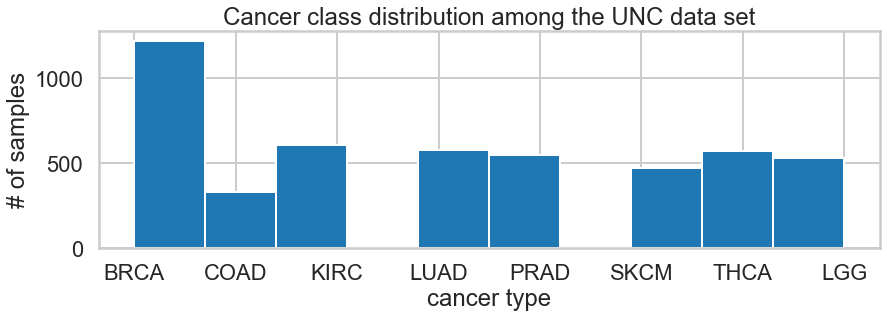

In [6]:
# Cancer class distribution among the UNC data set
plt.rcParams["figure.figsize"] = (14,4)
plt.title('Cancer class distribution among the UNC data set')
plt.hist(unc_mix8.label)
plt.xlabel('cancer type')
plt.ylabel('# of samples')

In [7]:
unc_mix8.describe()

gene_id,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,...,ZNRF2|223082,ZNRF3|84133,ZNRF4|148066,ZP1|22917,ZP2|7783,ZP3|7784,ZP4|57829,ZPBP2|124626,ZPBP|11055,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN1|284312,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.00000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.00000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.00000,...,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.00000,4859.000000,4859.000000,4859.000000
mean,0.019137,8.804371,9.946737,126.202266,881.626507,0.000055,243.665617,0.583563,0.210954,0.006088,4.445372,1.50385,6.734141,0.602679,0.288103,0.005802,0.002116,0.023938,57.963724,633.289676,12.209368,18.845937,396.880092,0.000098,1.118261,1.235998,64.913933,714.787183,46.546501,141.111525,34.493871,67.401479,122.210317,124.103023,20654.74843,446.453854,3.495624,0.338613,761.546492,7.370175,850.048691,1.138926,1.433994,0.187612,24.329327,169.941230,1121.267040,1187.212750,2675.482088,1.05999,...,588.455676,599.575475,0.112958,7.642420,5.051350,202.271167,0.894551,1.019641,0.169155,18.641693,984.498210,1374.102206,71.268157,278.418448,1.018597,42.518409,191.685804,126.052426,1412.911593,18.088875,64.677656,243.920000,117.654315,36.683975,470.439371,262.636157,3.631349,68.695170,1.789870,293.085822,0.316981,123.967192,420.125325,285.435906,465.377857,324.885714,163.025594,395.572462,325.013842,511.209529,62.667747,434.805875,1100.636202,53.844874,1036.682788,3831.068673,1352.70052,811.829277,209.243054,0.087035
std,0.101665,8.114689,9.138943,63.548653,367.781962,0.003839,220.551222,0.748920,1.984130,0.266593,79.486604,6.71785,4.081106,3.018727,2.082659,0.057160,0.041821,0.202317,188.067339,567.580314,11.990903,29.095458,468.723886,0.006836,10.481889,2.752970,381.017641,359.533899,73.903495,242.660197,96.370751,357.675409,170.439389,826.450461,26432.60218,478.472530,46.515409,1.779301,250.449584,32.726836,647.981709,13.208353,78.394415,0.692273,188.108855,207.734384,543.700783,706.016184,789.809051,2.95701,...,371.669106,674.927490,0.773602,28.261632,104.228115,187.867821,11.260629,20.191951,0.427269,296.425059,401.8

In [8]:
unc_mix8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4859 entries, TCGA-3C-AAAU-01A-11R-A41B-07 to TCGA-WY-A85E-01A-11R-A36H-07
Columns: 20532 entries, ?|100130426 to label
dtypes: float64(20531), object(1)
memory usage: 761.2+ MB


In [9]:
unc_mix8.columns = unc_mix8.columns.str.replace('\?\|', 'NA|')

In [10]:
unc_mix8.head()

gene_id,NA|100130426,NA|100133144,NA|100134869,NA|10357,NA|10431,NA|136542,NA|155060,NA|26823,NA|280660,NA|317712,NA|340602,NA|388795,NA|390284,NA|391343,NA|391714,NA|404770,NA|441362,NA|442388,NA|553137,NA|57714,NA|645851,NA|652919,NA|653553,NA|728045,NA|728603,NA|728788,NA|729884,NA|8225,NA|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,...,ZNRF3|84133,ZNRF4|148066,ZP1|22917,ZP2|7783,ZP3|7784,ZP4|57829,ZPBP2|124626,ZPBP|11055,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN1|284312,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,label
TCGA-3C-AAAU-01A-11R-A41B-07,0.0000,16.3644,12.9316,52.1503,408.076,0.0,1187.010,0.0000,0.0000,0.0,1.7233,0.3447,4.1359,0.0000,0.6893,0.0,0.0,0.0,3.7912,820.977,124.4220,25.8494,289.513,0.0,0.0,0.0000,109.6020,458.396,40.6697,197.090,0.0000,0.0000,102.9630,1.3786,5798.37,68.2424,8.6165,0.3447,649.337,1.3786,1087.400,0.0,0.0000,0.0,0.0000,5.5145,1300.40,517.333,2053.13,0.3447,...,741.706,0.0,3.7912,0.0000,411.791,0.0000,0.3447,1.034,53.7668,879.225,2504.080,72.0337,421.862,2.7573,128.1790,141.6550,225.062,132.349,0.3447,158.8880,253.510,300.887,38.2571,960.220,582.473,0.3447,32.3979,1.0340,431.513,0.3447,180.2570,489.416,454.9500,621.764,194.108,89.956,430.824,415.824,931.957,129.5920,1007.780,1658.500,258.4940,1208.370,3507.25,1894.930,1180.460,1.7233,0.0,BRCA
TCGA-3C-AALI-01A-11R-A41B-07,0.0000,9.2659,17.3790,69.7553,563.893,0.0,516.041,1.0875,0.5438,0.0,144.1000,4.8940,1.6313,8.1566,0.5438,0.0,0.0,0.0,0.0000,708.537,142.4690,13.3388,449.701,0.0,0.0,0.0000,3.8064,683.524,29.9076,237.384,0.0000,0.0000,70.8646,4.3502,7571.98,157.6940,0.5438,0.0000,887.983,35.3453,836.324,0.0,0.0000,0.0,1.0875,24.4698,3541.05,848.287,2979.88,2.1751,...,373.573,0.0,30.4513,4.3502,439.222,0.5438,2.1751,0.000,3.2626,566.068,627.656,62.5340,349.647,0.0000,58.2164,91.8978,174.551,1549.760,18.4883,27.7325,698.521,197.390,7.0691,588.363,236.542,0.0000,127.7870,4.3502,507.341,0.0000,139.2060,475.802,113.6490,242.523,217.134,105.492,340.402,1161.330,965.198,59.8151,448.613,1343.120,198.4770,603.589,5504.62,1318.650,406.743,926.5910,0.0,BRCA
TCGA-3C-AALJ-01A-31R-A41B-07,0.9066,11.6228,9.2294,154.2970,1360.830,0.0,592.022,0.0000,0.0000,0.0,0.0000,2.7199,2.7199,0.0000,0.0000,0.0,0.0,0.0,0.9066,391.659,34.4515,0.0000,1100.630,0.0,0.0,0.9066,0.0000,657.298,22.6655,423.237,0.9066,0.0000,161.2600,0.0000,8840.40,573.8890,0.0000,0.0000,723.481,2.7199,1533.090,0.0,1.8132,0.0,0.9066,53.4905,1360.83,568.450,2291.93,1.8132,...,257.480,0.0,2.7199,0.0000,334.506,0.0000,0.0000,0.000,117.8600,1125.110,1951.210,35.3581,470.535,0.0000,38.2684,99.7280,110.607,2225.750,112.4210,52.5839,282.865,138.713,46.2375,514.053,268.359,0.0000,62.5567,0.0000,352.675,0.0000,81.5956,485.947,180.4170,506.800,164.234,235.721,304.624,305.422,2531.280,35.3581,533.998,768.812,331.8220,532.185,5458.75,942.883,509.519,35.3581,0.0,BRCA
TCGA-3C-AALK-01A-11R-A41B-07,0.0000,12.0894,11.0799,143.8640,865.536,0.0,552.751,0.4137,0.0000,0.0,0.0000,2.0687,4.5511,0.0000,0.0000,0.0,0.0,0.0,0.0000,458.006,15.7220,0.0000,406.289,0.0,0.0,1.2412,34.7538,786.512,54.1994,191.018,0.0000,0.0000,62.5072,1.6549,10960.20,506.4130,0.0000,0.0000,776.996,0.0000,858.088,0.0,0.0000,0.0,2.8962,57.0956,1683.49,727.762,2762.52,0.4137,...,330.161,0.0,1.2412,1.6549,127.017,0.4137,0.0000,0.000,9.1022,780.306,1195.830,61.2329,364.501,0.8275,33.4506,211.8330,163.012,1276.380,6.206

## Select full data set to try multiple algorithms:

In [11]:
# here you get 100% of the rows
unc_mix_small = unc_mix8.sample(frac = 1.0, random_state=888)

In [12]:
### generate data frame profile:
# unc_mix_small_profile = ProfileReport(unc_mix_small, title="unc_mix_small Data Profiling Report")

In [13]:
## Take too long to compute
# unc_mix_small_profile.to_widgets()

In [14]:
## Take too long to compute
# unc_mix_small_profile.to_notebook_iframe()

Text(0, 0.5, '# of samples')

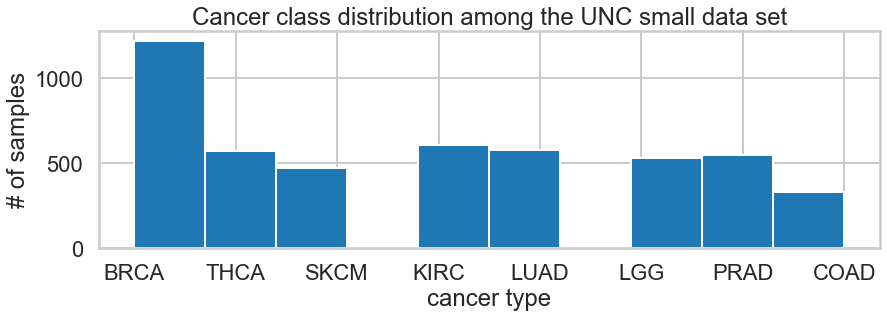

In [15]:
# Cancer class distribution among the UNC "small" data set
plt.rcParams["figure.figsize"] = (14,4)
plt.title('Cancer class distribution among the UNC small data set')
plt.hist(unc_mix_small.label)
plt.xlabel('cancer type')
plt.ylabel('# of samples')

In [16]:
unc_mix_small_label = unc_mix_small.pop('label')
unc_mix_small_label.head()

TCGA-A7-A26H-01A-11R-A169-07    BRCA
TCGA-E8-A2EA-01A-11R-A180-07    THCA
TCGA-FS-A1ZE-06A-11R-A18T-07    SKCM
TCGA-ET-A25P-01A-11R-A16R-07    THCA
TCGA-DA-A1I8-06A-11R-A18T-07    SKCM
Name: label, dtype: object

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    unc_mix_small, unc_mix_small_label, test_size=0.25, random_state=42)

In [18]:
ulabels = y_train.unique()
ulabels.sort()
ulabels

array(['BRCA', 'COAD', 'KIRC', 'LGG', 'LUAD', 'PRAD', 'SKCM', 'THCA'],
      dtype=object)

### XGBoost is the best classification algorithm from the protype analysis https://github.com/ZhanyangZhuSD/UCSDMLCapstone/blob/main/GeneExpressionCancerRNA-Seq.ipynb

### XGBoost

In [19]:
import xgboost
xgboost.set_config(verbosity=0)
print(xgboost.__version__)

1.5.0


In [20]:
from xgboost import XGBClassifier

In [21]:
xgb = XGBClassifier(random_state=101)
xgboost.set_config(verbosity=0)

In [22]:
start = time.time()
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
end = time.time()
print(end - start)
print(xgb)

179.35129189491272
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=20,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=101, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [23]:
xgb_a = accuracy_score(y_test, xgb_y_pred)
xgb_a

0.9991769547325103

In [24]:
xgb_r = sklearn.metrics.confusion_matrix(y_test, xgb_y_pred)
xgb_r

array([[326,   0,   0,   0,   0,   0,   0,   0],
       [  0,  61,   0,   0,   0,   0,   0,   0],
       [  0,   0, 157,   0,   0,   0,   0,   0],
       [  0,   0,   0, 133,   0,   0,   0,   0],
       [  0,   0,   0,   0, 143,   0,   0,   0],
       [  0,   0,   0,   0,   0, 139,   0,   0],
       [  0,   0,   1,   0,   0,   0, 105,   0],
       [  0,   0,   0,   0,   0,   0,   0, 150]], dtype=int64)

In [25]:
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00       326
        COAD       1.00      1.00      1.00        61
        KIRC       0.99      1.00      1.00       157
         LGG       1.00      1.00      1.00       133
        LUAD       1.00      1.00      1.00       143
        PRAD       1.00      1.00      1.00       139
        SKCM       1.00      0.99      1.00       106
        THCA       1.00      1.00      1.00       150

    accuracy                           1.00      1215
   macro avg       1.00      1.00      1.00      1215
weighted avg       1.00      1.00      1.00      1215



In [26]:
importances_xgb = xgb.feature_importances_
gene_importances_xgb = pd.Series(importances_xgb, index=unc_mix_small.columns)
top15_xgb = gene_importances_xgb.nlargest(n=15)

In [27]:
nt=20
top_xgb = gene_importances_xgb.nlargest(n=nt)

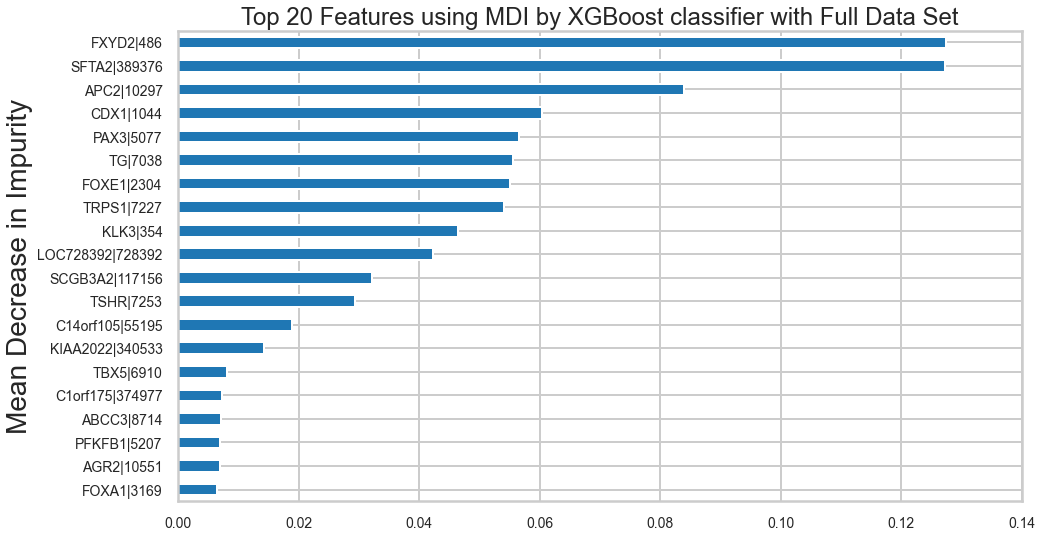

In [28]:
plt.rcParams["figure.figsize"] = (15,8)
# Set the axes labels font size
plt.rc('axes', labelsize=28)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
fig, (ax) = plt.subplots(1, 1)
top_xgb.plot.barh( ax=ax)
ax.set_title("Top " + str(nt) + " Features using MDI by XGBoost classifier with Full Data Set")
ax.set_ylabel("Mean Decrease in Impurity")
ax.invert_yaxis()  # labels read top-to-bottom
# top15.plot.barh(ax=ax1)
# ax1.set_title("Top 15 Feature importances using MDI by Random Forest classifier")
plt.xlim([0.0, 0.14])
fig.tight_layout()

## Features with non-zero importance:

In [29]:
### Features with non-zero importance:
importances_xgb_nonZ = importances_xgb[importances_xgb > 0.0]
gene_importances_xgb_nonZ = pd.Series(importances_xgb_nonZ, index=unc_mix_small.columns[importances_xgb > 0.0])

In [30]:
print("Total number of features with non-zero importance = " + str(len(importances_xgb_nonZ)))

Total number of features with non-zero importance = 336


Text(0.5, 0, 'Log of the non-Zero feature importance')

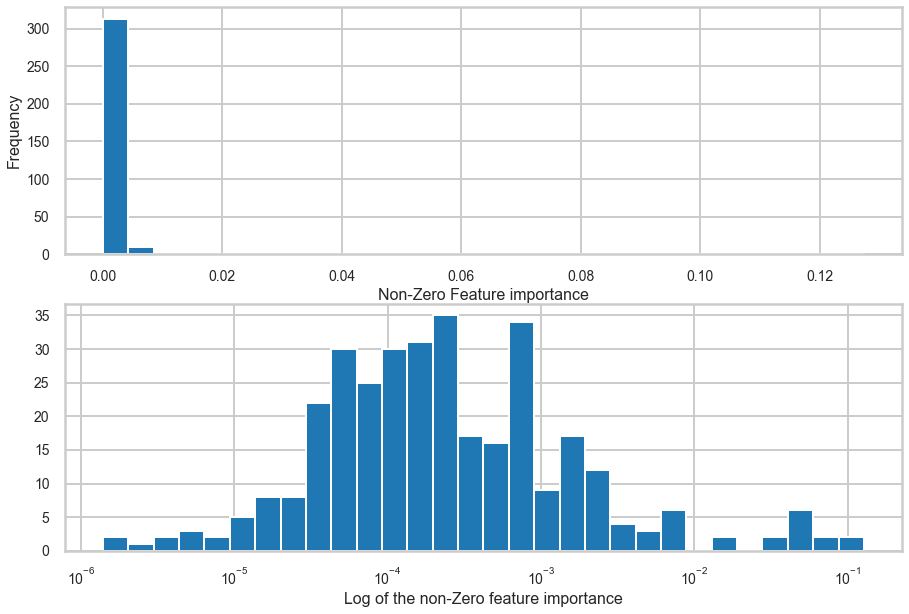

In [31]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rc('axes', labelsize=16)
plt.subplot(211)
hist, bins, _  = plt.hist(importances_xgb_nonZ,  bins=30)
plt.ylabel('Frequency')
plt.xlabel('Non-Zero Feature importance')
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(212)
plt.hist(importances_xgb_nonZ, bins=logbins)
plt.xscale('log')
plt.xlabel('Log of the non-Zero feature importance')

In [32]:
def xgboost_with_feature_cutoff(feature_cutoff=0): 
    X_train_new = X_train[unc_mix_small.columns[importances_xgb > feature_cutoff]]
    X_test_new = X_test[unc_mix_small.columns[importances_xgb > feature_cutoff]] 
    xgb_new = XGBClassifier(random_state=101)
    start = time.time()
    xgb_new.fit(X_train_new, y_train)   
    xgb_y_pred_new = xgb_new.predict(X_test_new)
    end = time.time()
    print("#######:")
    print("Training time: " + str(end - start))
    xgb_accuracy = accuracy_score(y_test, xgb_y_pred_new)
    n_col = len(unc_mix_small.columns[importances_xgb > feature_cutoff])
    print("Cutoff: " + str(feature_cutoff) + "; Number of genes/features: " + str(n_col))
    print("xgb_accuracy: " + str(xgb_accuracy))
    print("Classification Report: ")
    print(classification_report(y_test, xgb_y_pred_new))
    result = {"xgb_model": xgb_new, 
              "accuracy": xgb_accuracy,
              "y_pred": xgb_y_pred_new,
              "num_features": n_col,
              "cutoff": feature_cutoff}
    return result


In [33]:
cutoffs = [0.000001, 0.00001, 0.0001, 0.0005, 0.001, 0.01]
n_cutoff = len(cutoffs)
results = {"xgb_model": [], 
           "accuracy": [],
           "y_pred": [],
           "num_features": [],
           "cutoff": []
          }
res_keys = results.keys();
for cutoff in cutoffs:
    new_result = xgboost_with_feature_cutoff(cutoff)
    for dk in res_keys:
        results[dk].append(new_result.get(dk))
    

#######:
Training time: 3.2429490089416504
Cutoff: 1e-06; Number of genes/features: 336
xgb_accuracy: 0.9991769547325103
Classification Report: 
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00       326
        COAD       1.00      1.00      1.00        61
        KIRC       0.99      1.00      1.00       157
         LGG       1.00      1.00      1.00       133
        LUAD       1.00      1.00      1.00       143
        PRAD       1.00      1.00      1.00       139
        SKCM       1.00      0.99      1.00       106
        THCA       1.00      1.00      1.00       150

    accuracy                           1.00      1215
   macro avg       1.00      1.00      1.00      1215
weighted avg       1.00      1.00      1.00      1215

#######:
Training time: 3.295426368713379
Cutoff: 1e-05; Number of genes/features: 326
xgb_accuracy: 0.9991769547325103
Classification Report: 
              precision    recall  f1-score   support

     

In [34]:
results

{'xgb_model': [XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=20,
                num_parallel_tree=1, objective='multi:softprob', predictor='auto',
                random_state=101, reg_alpha=0, reg_lambda=1,
                scale_pos_weight=None, subsample=1, tree_method='exact',
                validate_parameters=1, verbosity=None),
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012

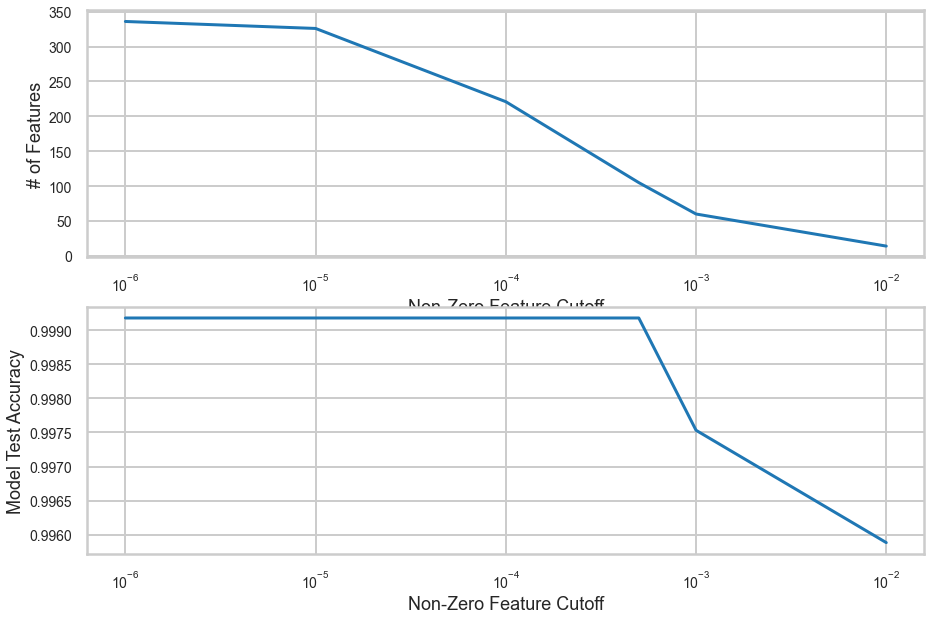

In [35]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('axes', labelsize=18)
plt.subplot(211)
plt.plot(results['cutoff'], results['num_features'])
plt.ylabel('# of Features')
plt.xlabel('Non-Zero Feature Cutoff')
plt.xscale('log')
plt.subplot(212)
plt.plot(results['cutoff'], results['accuracy'])
plt.ylabel('Model Test Accuracy')
plt.xlabel('Non-Zero Feature Cutoff')
plt.xscale('log')

## Conclusion: 

### 1. With feature importance cutoff at 0.0005, the # of features (i.e. genes) is 105. The classification accuracy stays at 0.99918. 

### 2. Given the number of genes reduced to 105 from 20530, the cancer test will be cheaper and easier to run.